In [1]:
import pandas as pd
import numpy as np

def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized-losses    195 non-null object
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression-ratio    195 non-null float64
horsepower           195 non-n

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# lmplot

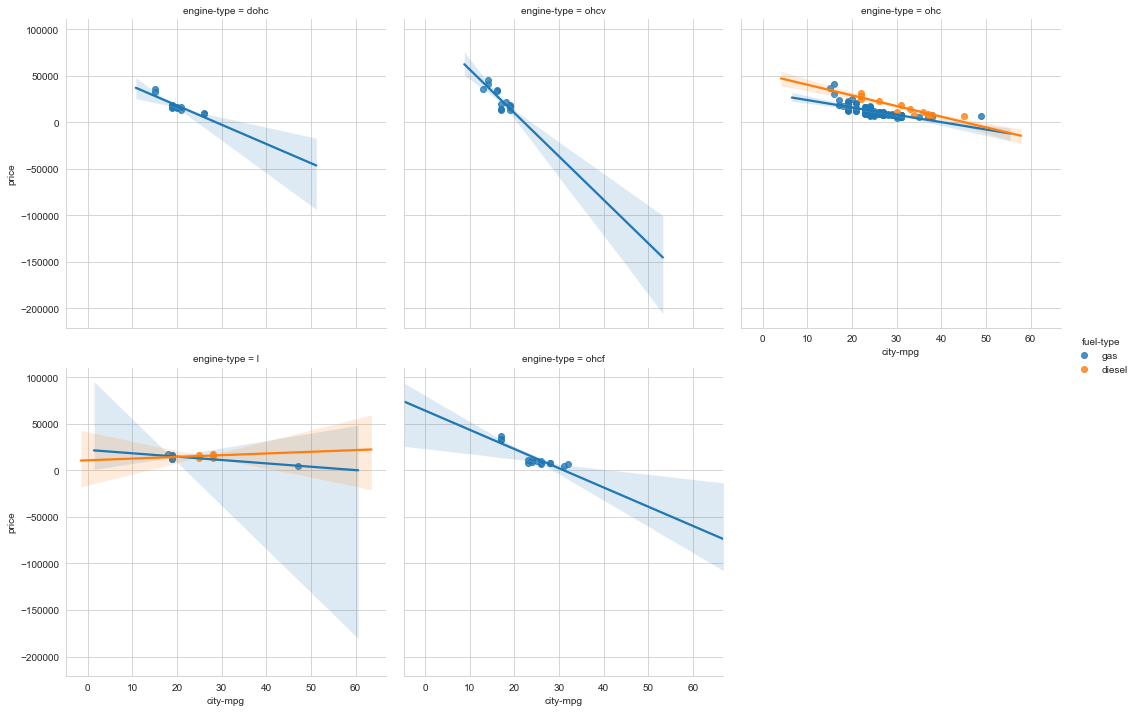

In [49]:
# num = city-mpg, price
# cat = fuel-type, engine-type

sns.lmplot(data=auto_prices, 
           x='city-mpg', 
           y='price', 
           hue='fuel-type', 
           col='engine-type', 
           col_wrap=3, )

# bar plot

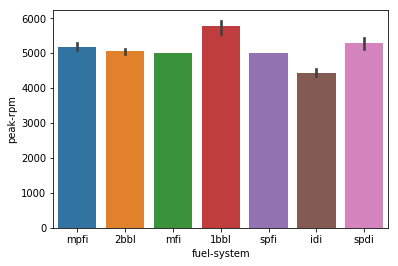

In [37]:
# cat = fuel-system
# num = peak-rpm, city-mpg, highway-mpg

#f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
sns.barplot(data=auto_prices, 
            x='fuel-system', 
            y='peak-rpm')
#sns.barplot(data=auto_prices, x='fuel-system', y='city-mpg', ax=ax2, palette='deep', alpha=0.5)
#sns.barplot(data=auto_prices, x='fuel-system', y='highway-mpg', ax=ax2, palette='deep', alpha=0.5)

# KDE Plot

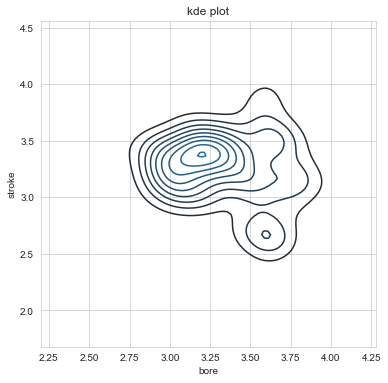

In [46]:
# num = bore, stroke
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.set_title('kde plot')
ax.set_xlabel('bore')
ax.set_ylabel('stroke')
sns.set_style('whitegrid')
sns.kdeplot(auto_prices[['bore', 'stroke']], ax=ax )

# Joint Plot

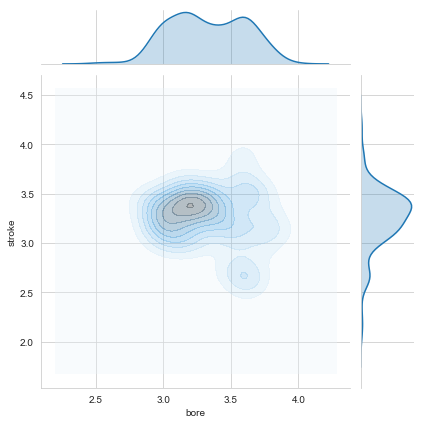

In [55]:
#

sns.jointplot('bore', 'stroke', data = auto_prices, kind='kde', alpha = 0.3)

# rel plot

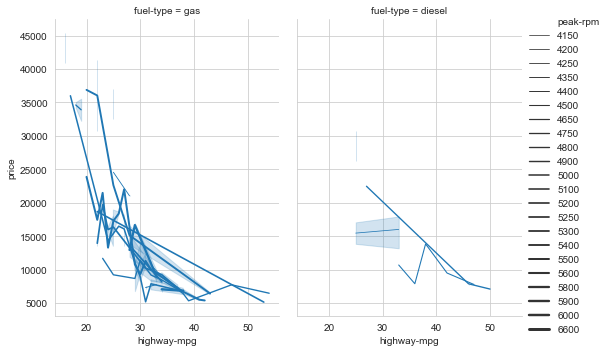

In [60]:
# !!! for data that have order like time or value of either x or y don't repeated -- fail example
# num = price, highway-mpg, peak-rpm 
# cat = fuel-type, engine-type

sns.relplot(x="highway-mpg", y="price",
            hue="body-style", size="peak-rpm", col="fuel-type",
            palette='rocket',
            height=5, aspect=.75,
            kind="line", legend="full", data=auto_prices)

# line with error band

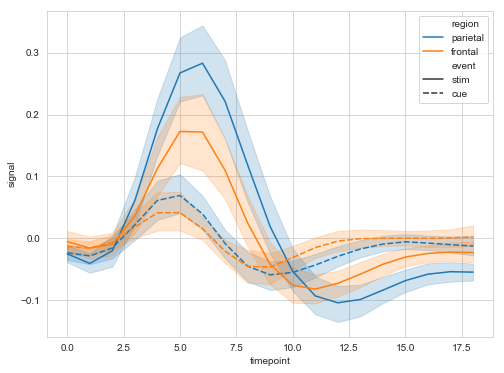

In [64]:
fmri = sns.load_dataset("fmri")

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri, ax=ax)

# violin join split

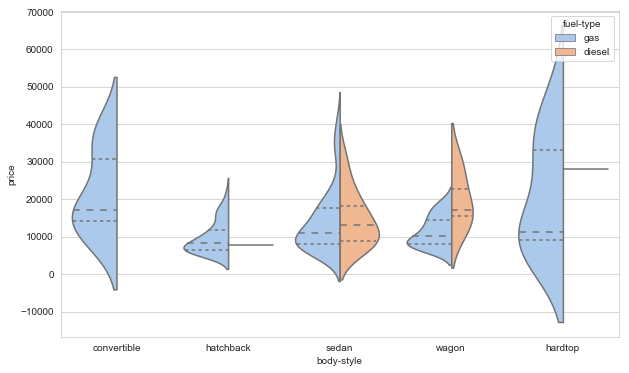

In [69]:
# num = price
# cat = body-style, fuel-type

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.violinplot(data = auto_prices, 
               x = 'body-style', 
               y = 'price', 
               hue='fuel-type', 
               ax=ax,
               inner='quart',
               palette='pastel',
               split=True)

# cat plot

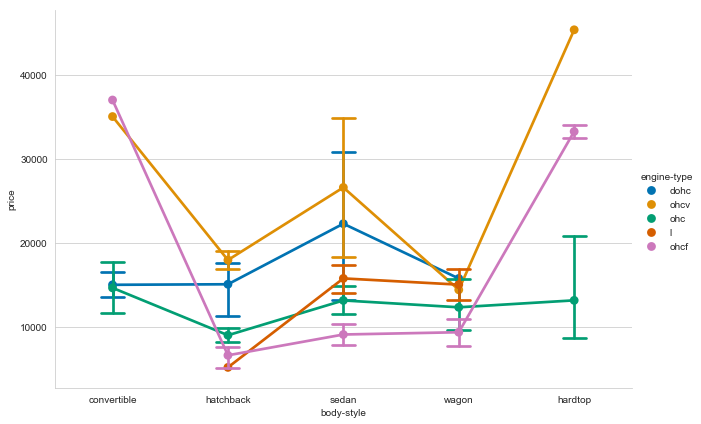

In [77]:
# num = price, 
# cat = body-style, engine-type, fuel-type

g = sns.catplot(x="body-style", y="price", hue="engine-type",
                capsize=.2, palette="colorblind", height=6, aspect=1.5,
                kind="point", data=auto_prices)

# Swarm Plot

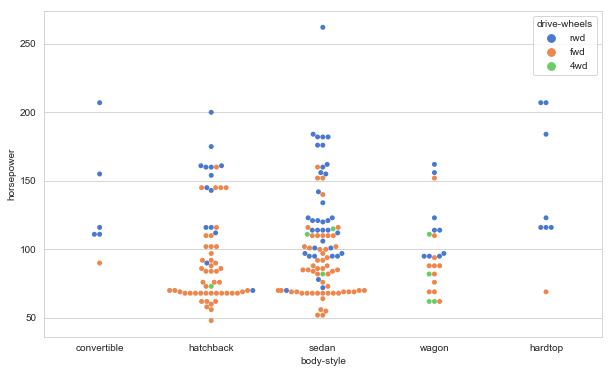

In [85]:
# num = horsepower
# cat = drive-wheels, engine-location

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.swarmplot(x="body-style", y="horsepower", hue="drive-wheels",
              palette='muted', data=auto_prices, ax=ax)